$$ ITI \space AI-Pro: \space Intake \space 45 $$
$$ Deep \space Learning $$
$$ Lab \space no. \space 3 $$

# `01` Assignment 01
- Design your own `deep NN` to classify the `CIFAR 10` images (you can download from keras.dataset) into one of the 10 classes
- Investigate the use of different architectures (`different layers`, `learning rate`, `optimizers`, `loss function`)
- Note you will need to `flatten` the image and use it as your input vector

## `+` Import Libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import datasets
import matplotlib.pyplot as plt
import numpy as np
from keras import Input
from keras.models import Sequential
from keras.layers import Dense,Conv2D,BatchNormalization,Flatten,AveragePooling2D,Activation,MaxPooling2D,Dropout,GlobalAveragePooling2D
from keras.callbacks import EarlyStopping
from keras import optimizers
from keras.utils import to_categorical
from keras.applications.resnet_v2 import ResNet50V2
from keras.applications.mobilenet_v2 import MobileNetV2

## `+` Load & Preprocess CIFAR 10 Dataset

In [2]:
(X_train, y_train), (X_test, y_test) =keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [3]:
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (50000, 32, 32, 3)
Shape of y_train: (50000, 1)
Shape of X_test: (10000, 32, 32, 3)
Shape of y_test: (10000, 1)


### Preview the Images

In [4]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

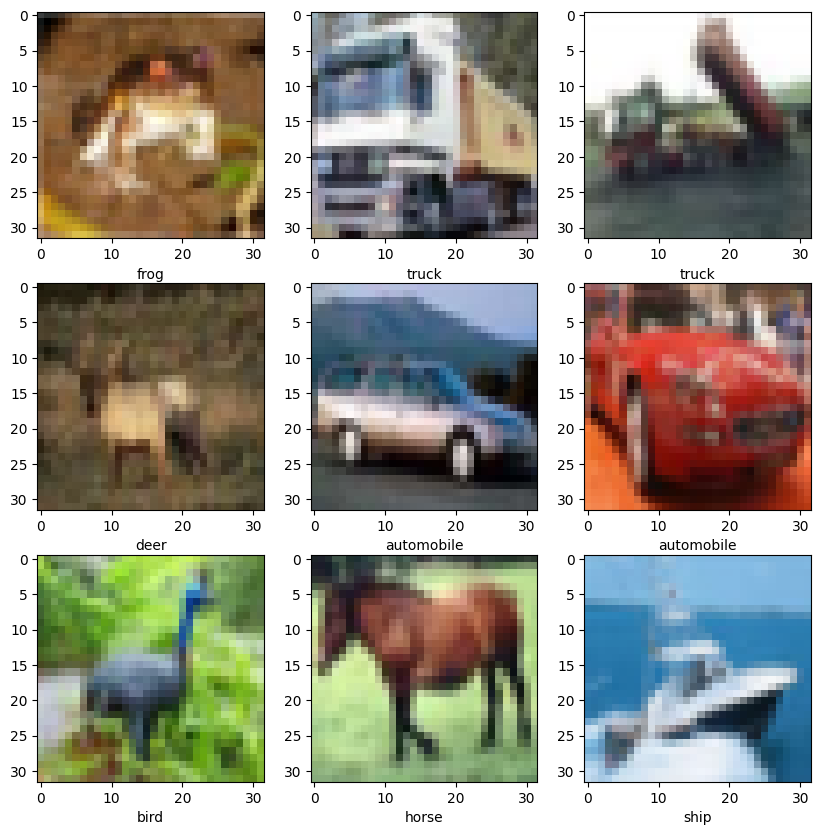

In [5]:
num_images = 9
plt.figure(figsize=(10, 10))
for i in range(num_images):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_train[i])
    plt.xlabel(class_names[y_train[i][0]])


### Feature Rescaling

In [6]:
# Rescale Input
X_train =X_train/255
X_test  =X_test/255

In [7]:
first_image = X_train[0]
min_value = np.min(first_image)
max_value = np.max(first_image)
print(min_value)
print(max_value)

0.0
1.0


### OneHotEncode Target Variable

In [8]:
y_train = keras.utils.to_categorical(y_train,10)
y_test = keras.utils.to_categorical(y_test,10)

In [9]:
print(y_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


## `+` Set Global Parameters

In [10]:
# Hyperparameters
BATCH_SIZE  = 64
NUM_CLASSES = 10
EPOCHS      =100

## `i` Trial no. 1

In [11]:
# X_train = X_train.reshape(X_train.shape[0], 32 * 32 * 3)
# X_test = X_test.reshape(X_test.shape[0], 32 * 32 * 3)

### Model Training

## ANN

In [12]:
model=Sequential()
model.add(Input(shape=X_train.shape[1:]))
# model.add(Dense(3072, input_shape=(3072,), activation="relu"))
model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dense(64,activation="relu"))


model.add(Dense(32))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.2))

model.add(Dense(32))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.2))


model.add(Dense(10,activation="softmax"))

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         393,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 409,482 (1.56 MB)

 Trainable params: 409,354 (1.56 MB)

 Non-trainable params: 128 (512.00 B)

In [13]:
model.compile(keras.optimizers.Adam(learning_rate=0.001), loss="categorical_crossentropy", metrics=["accuracy"])

In [14]:
callbacks = [EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)]

In [15]:
history=model.fit(X_train,y_train,batch_size=BATCH_SIZE,epochs=EPOCHS,validation_split=0.15,callbacks=callbacks)

Epoch 1/100
665/665 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - accuracy: 0.2287 - loss: 2.1226 - val_accuracy: 0.2797 - val_loss: 2.0598
Epoch 2/100
665/665 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3250 - loss: 1.8640 - val_accuracy: 0.2991 - val_loss: 1.9488
Epoch 3/100
665/665 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3598 - loss: 1.7755 - val_accuracy: 0.3491 - val_loss: 1.7919
Epoch 4/100
665/665 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3853 - loss: 1.7111 - val_accuracy: 0.3919 - val_loss: 1.7084
Epoch 5/100
665/665 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4011 - loss: 1.6671 - val_accuracy: 0.3529 - val_loss: 1.8023
Epoch 6/100
665/665 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4085 - loss: 1.6593 - val_accuracy: 0.4300 - val_loss: 1.5908
Epoch 7/100
665/665 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4244 - loss: 1.6192 - val_accuracy: 0.4151 - val_loss: 1.6106
Epoch 8/100
665/665 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4291 - loss: 1.6080 - val_ac

### Model Evaluation

In [16]:
# Evaluate on the training set
train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=1)
print(f"Accuracy for training: {train_accuracy * 100:.2f}")

# Evaluate on the testing set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Accuracy for testing: {test_accuracy * 100:.2f}")

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5906 - loss: 1.1659
Accuracy for training: 57.41
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5117 - loss: 1.3874
Accuracy for testing: 50.57


### Result Visualization

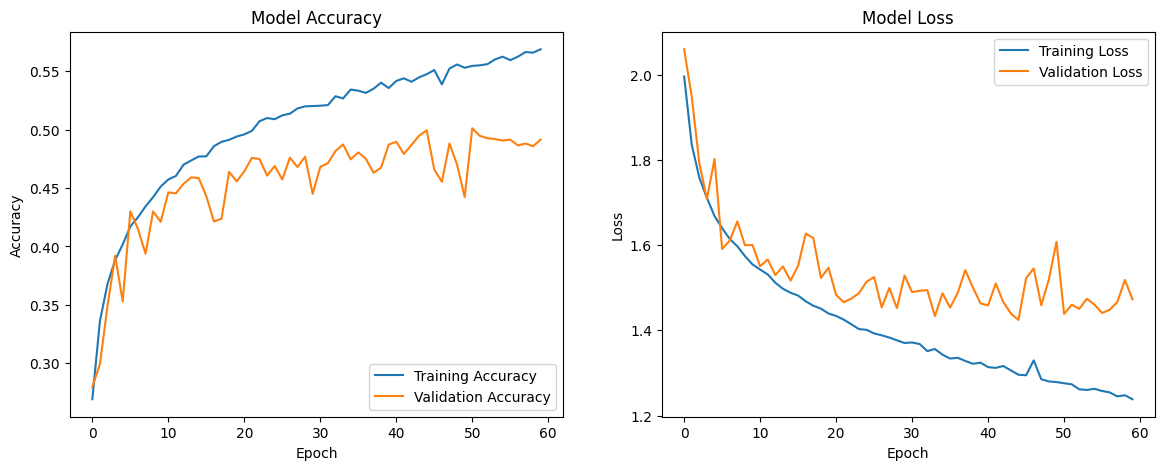

In [17]:
# Plot the training and validation accuracy and loss
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.show()


In [18]:
# Making the Predictions
pred = model.predict(X_test)
print(pred)

# Converting the predictions into label index
pred_classes = np.argmax(pred, axis=1)
print(pred_classes)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[[7.74746016e-02 3.78112830e-02 5.88163435e-02 ... 5.41930310e-02
  1.57564268e-01 5.24227247e-02]
 [2.20600981e-02 1.33080557e-01 1.95365539e-03 ... 1.99455954e-03
  8.30730125e-02 7.53529310e-01]
 [3.09428394e-01 1.04287341e-01 3.53569761e-02 ... 2.20648833e-02
  3.39682817e-01 1.52818277e-01]
 ...
 [1.02669284e-01 9.13370401e-04 3.27176183e-01 ... 3.23699825e-02
  7.25037977e-02 2.46999785e-03]
 [3.14429700e-02 5.07750697e-02 3.01648110e-01 ... 9.91242304e-02
  1.19685754e-02 3.09790075e-02]
 [5.53967338e-03 1.00740360e-03 3.20336185e-02 ... 8.02726150e-01
  5.10505866e-04 5.03416546e-03]]
[3 9 8 ... 2 2 7]


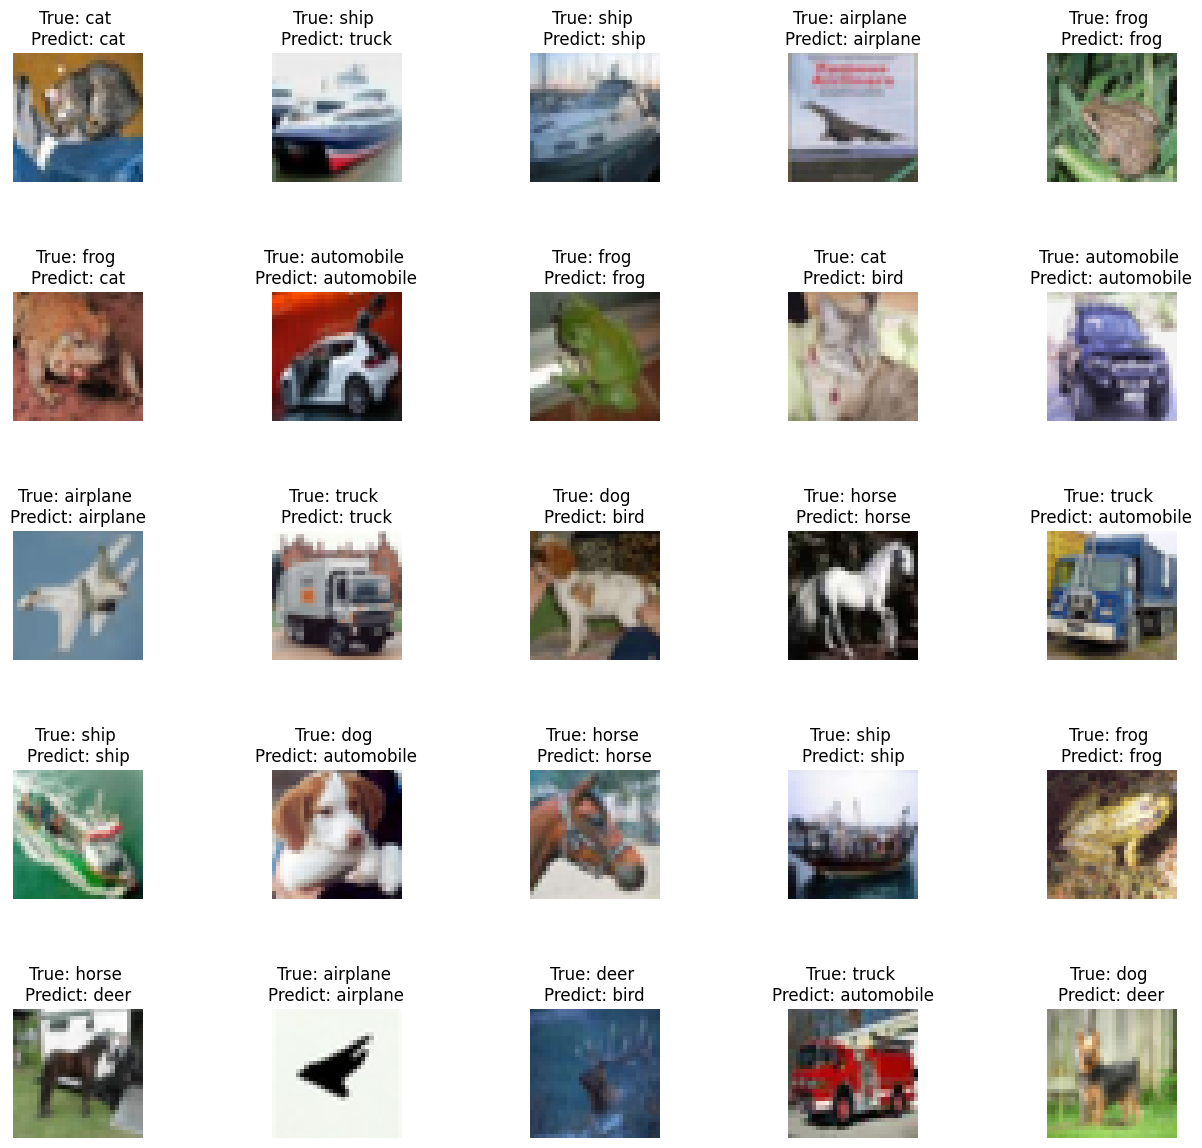

In [19]:
# Plotting the Actual vs. Predicted results

fig, axes = plt.subplots(5, 5, figsize=(15,15))
axes = axes.ravel()

for i in np.arange(0, 25):
    axes[i].imshow(X_test[i])
    axes[i].set_title("True: %s \nPredict: %s" % (class_names[np.argmax(y_test[i])], class_names[pred_classes[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

## `ii` Trial no. 2

### Model Training

### CNN

In [20]:
model_1=Sequential()
model_1.add(Input(shape=X_train.shape[1:]))
model_1.add(Conv2D(64,(5,5),padding="same"))
model_1.add(MaxPooling2D(2,2))

model_1.add(Conv2D(32,(3,3),padding="same"))
model_1.add(MaxPooling2D(2,2))


model_1.add(Conv2D(64,(3,3)))
model_1.add(MaxPooling2D(2,2))

model_1.add(Flatten())
model_1.add(Dense(128,activation="relu"))
model_1.add(Dropout(0.2))

model_1.add(Dense(64))
model_1.add(BatchNormalization())
model_1.add(Activation("relu"))
model_1.add(Dropout(0.2))

model_1.add(Dense(10,activation="softmax"))


model_1.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 64)          │           4,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 6, 6, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 3, 3, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 124,842 (487.66 KB)

 Trainable params: 124,714 (487.16 KB)

 Non-trainable params: 128 (512.00 B)

In [21]:
model_1.compile(keras.optimizers.Adam(learning_rate=0.001), loss="categorical_crossentropy", metrics=["accuracy"])

In [22]:
callbacks = [EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)]

In [23]:
history=model_1.fit(X_train,y_train,batch_size=BATCH_SIZE,epochs=EPOCHS,validation_split=0.15,callbacks=callbacks)

Epoch 1/100
665/665 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.3156 - loss: 1.8910 - val_accuracy: 0.5124 - val_loss: 1.3565
Epoch 2/100
665/665 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5225 - loss: 1.3330 - val_accuracy: 0.5436 - val_loss: 1.2951
Epoch 3/100
665/665 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5979 - loss: 1.1358 - val_accuracy: 0.6247 - val_loss: 1.0667
Epoch 4/100
665/665 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6508 - loss: 1.0053 - val_accuracy: 0.6340 - val_loss: 1.0473
Epoch 5/100
665/665 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6691 - loss: 0.9509 - val_accuracy: 0.6543 - val_loss: 0.9924
Epoch 6/100
665/665 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6884 - loss: 0.8875 - val_accuracy: 0.6935 - val_loss: 0.8798
Epoch 7/100
665/665 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7147 - loss: 0.8211 - val_accuracy: 0.6668 - val_loss: 0.9443
Epoch 8/100
665/665 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7248 - loss: 0.7904 - val_ac

### Model Evaluation

In [24]:
# Evaluate on the training set
train_loss, train_accuracy = model_1.evaluate(X_train, y_train, verbose=1)
print(f"Accuracy for training: {train_accuracy * 100:.2f}")

# Evaluate on the testing set
test_loss, test_accuracy = model_1.evaluate(X_test, y_test, verbose=1)
print(f"Accuracy for testing: {test_accuracy * 100:.2f}")

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8607 - loss: 0.4120
Accuracy for training: 84.05
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7227 - loss: 0.8222
Accuracy for testing: 71.77


### Result Visualization

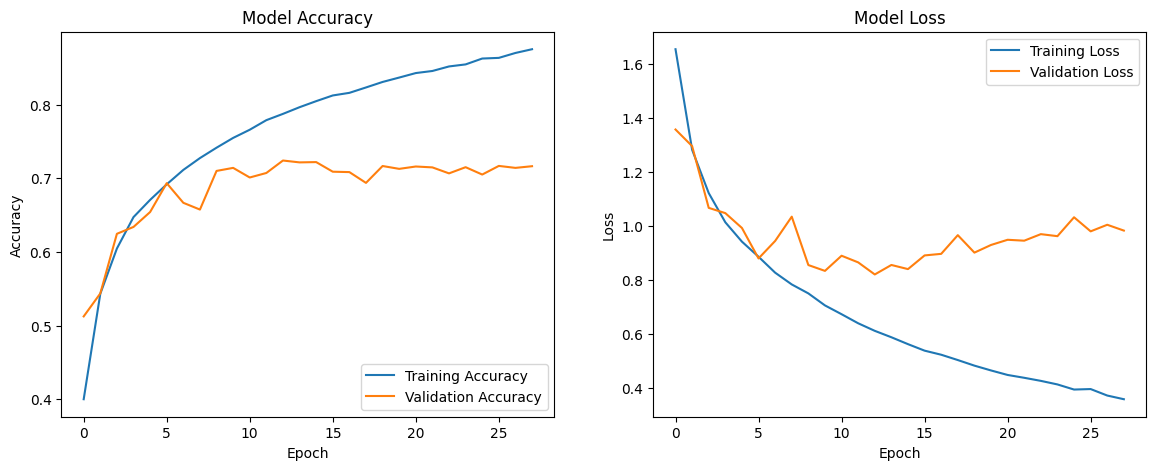

In [25]:
# Plot the training and validation accuracy and loss
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.show()


In [26]:
# Making the Predictions
pred = model_1.predict(X_test)
print(pred)

# Converting the predictions into label index
pred_classes = np.argmax(pred, axis=1)
print(pred_classes)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
[[4.9168413e-04 1.3233903e-04 8.1378100e-03 ... 1.8531545e-03
  5.2574161e-03 9.5927768e-04]
 [1.5362880e-02 4.0698028e-01 6.9691472e-05 ... 3.6518659e-07
  5.7128751e-01 6.2313587e-03]
 [2.0650813e-01 2.1357569e-01 7.8314282e-03 ... 5.6132795e-03
  4.7917187e-01 5.6197740e-02]
 ...
 [2.3099903e-05 4.3485940e-07 3.6052938e-03 ... 8.1163639e-04
  4.0411596e-06 8.3543182e-06]
 [2.9162911e-03 4.0902756e-03 2.1132968e-02 ... 1.5520095e-03
  8.3058426e-04 7.0792885e-04]
 [3.9676934e-06 2.5104337e-06 6.8500995e-05 ... 9.9610019e-01
  4.2947349e-07 1.9231243e-06]]
[3 8 8 ... 5 4 7]


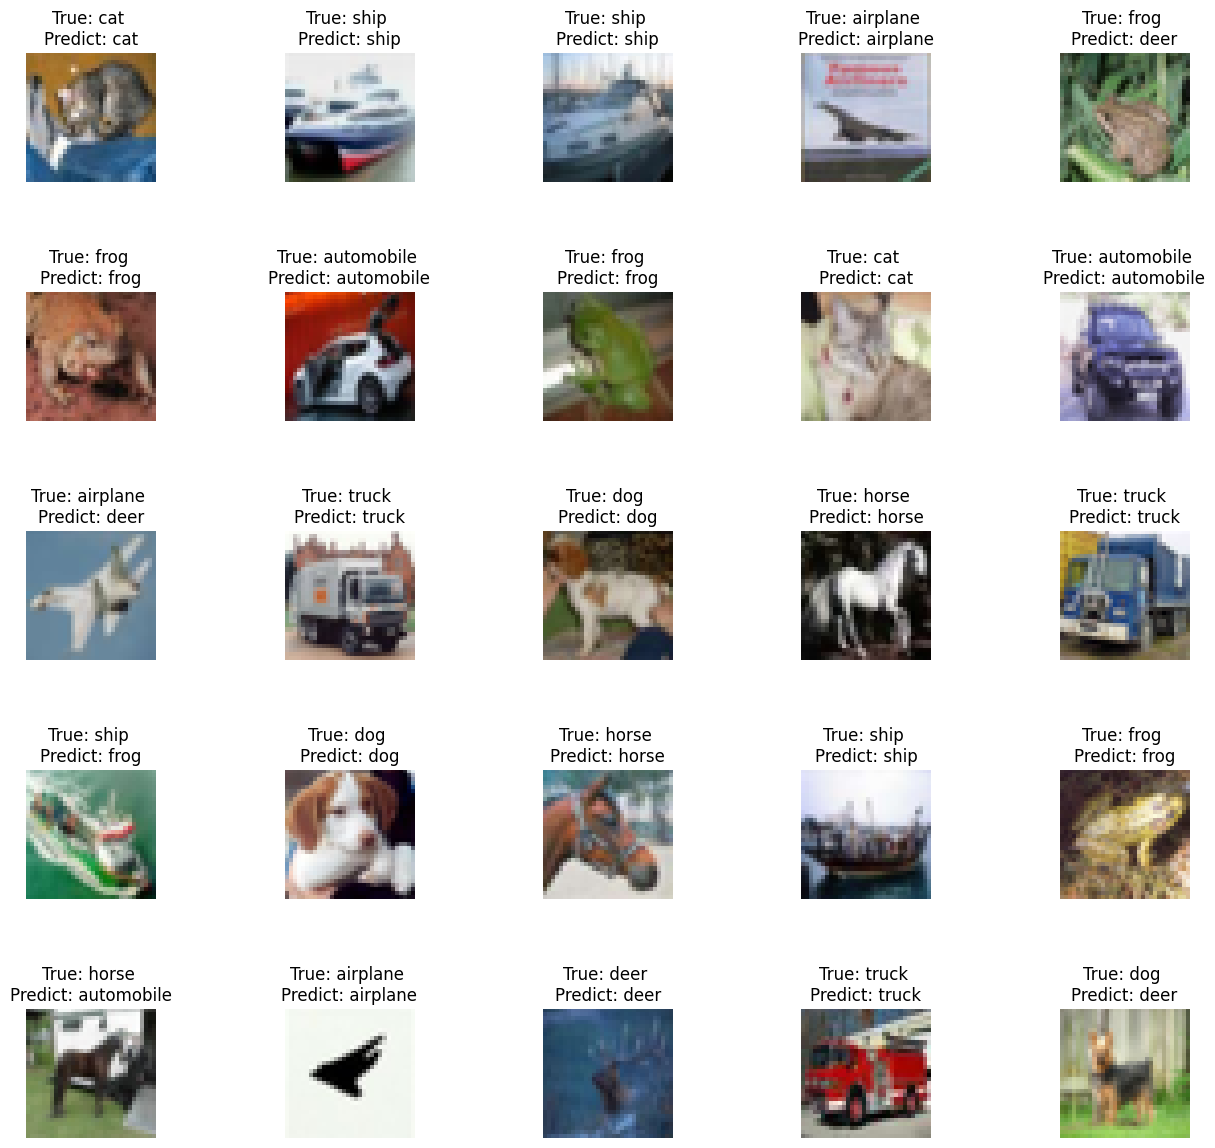

In [27]:
# Plotting the Actual vs. Predicted results

fig, axes = plt.subplots(5, 5, figsize=(15,15))
axes = axes.ravel()

for i in np.arange(0, 25):
    axes[i].imshow(X_test[i])
    axes[i].set_title("True: %s \nPredict: %s" % (class_names[np.argmax(y_test[i])], class_names[pred_classes[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

**Note:** Add more trials and explore different hyperparameters and design decisions.

------------------------------

# Assignment 02: Transfer Learning
- Design your `deep convolutional neural network` to classify the `CIFAR 10` images into one of the 10 classes
- Use a pre-trained model to boost your network.
- Invistage the use of different architectures (different `layers`, `kernel sizes`, `pooling`, `learning rate`, `optimizers`, `loss function`)

You have to specify filters and kernel_size. These parameters have no default.

Default padding is valid, which means no zero-padding, and the default strides is (1,1).

$\frac{N - F + 2P}{S} + 1$

$P = \frac{F - 1}{2}$

## `i` Trial no. 1

In [28]:
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
# from tensorflow.keras.applications import MobileNetV2
# from tensorflow.keras.datasets import cifar10
# from tensorflow.keras.utils import to_categorical
# from tensorflow.keras.callbacks import EarlyStopping
# from tensorflow.keras.optimizers import Adam

# # Load CIFAR-10
# (X_train, y_train), (X_test, y_test) = cifar10.load_data()

# # Normalize
# X_train = X_train.astype("float32") / 255.0
# X_test = X_test.astype("float32") / 255.0

# # Resize to 96x96 for pretrained model
# X_train = tf.image.resize(X_train, (96, 96))
# X_test = tf.image.resize(X_test, (96, 96))

# # One-hot encode
# y_train = to_categorical(y_train, 10)
# y_test = to_categorical(y_test, 10)

# # Define pretrained MobileNetV2
# base_model = MobileNetV2(input_shape=(96, 96, 3), include_top=False, weights='imagenet')
# base_model.trainable = False  # Freeze

# # Build model
# model = Sequential([
#     base_model,
#     GlobalAveragePooling2D(),
#     Dense(128, activation='relu'),
#     Dense(10, activation='softmax')
# ])

# # Compile
# model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# # Callback
# early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# # Train
# history = model.fit(X_train, y_train,
#                     epochs=50,
#                     batch_size=64,
#                     validation_split=0.15,
#                     callbacks=[early_stop])


### Model Training

### MobileNetV2

In [29]:
X_train = tf.image.resize(X_train, (64, 64))
X_test = tf.image.resize(X_test, (64, 64))


In [30]:
pre_trained = ResNet50V2(include_top=False, weights="imagenet", input_shape=(64, 64, 3))
for layer in pre_trained.layers:
  layer.trainable = False
pre_trained.summary()

94668760/94668760 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "resnet50v2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 64, 64, 3)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 70, 70, 3)      │              0 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 32, 32, 64)     │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 34, 34, 64)     │              0 │ conv1_conv[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 16, 16, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_preact_bn    │ (None, 16, 16, 64)     │            256 │ pool1_pool[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_preact_relu  │ (None, 16, 16, 64)     │              0 │ conv2_block1_preact_b… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 16, 16, 64)     │          4,096 │ conv2_block1_preact_r… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 16, 16, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 16, 16, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_pad        │ (None, 18, 18, 64)     │              0 │ conv2_block1_1_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 16, 16, 64)     │         36,864 │ conv2_block1_2_pad[0]… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 16, 16, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 16, 16, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv  

 Total params: 23,564,800 (89.89 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,564,800 (89.89 MB)

In [31]:
base_model = MobileNetV2(input_shape=(64, 64, 3), weights="imagenet", include_top=False)
base_model.trainable = False

<ipython-input-31-ff606a963155>:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(input_shape=(64, 64, 3), weights="imagenet", include_top=False)


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [32]:
model_T = Sequential()
model_T.add(base_model)
model_T.add(GlobalAveragePooling2D())
model_T.add(Dense(128, activation='relu'))
model_T.add(Dense(10, activation='softmax'))

model_T.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224 (Functional)    │ (None, 2, 2, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 128)                 │         163,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,423,242 (9.24 MB)

 Trainable params: 165,258 (645.54 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [33]:
model_T.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [34]:
callbacks = [EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)]

In [35]:
history=model_T.fit(X_train,y_train,batch_size=128,epochs=100,validation_split=0.15,callbacks=callbacks)

Epoch 1/100
333/333 ━━━━━━━━━━━━━━━━━━━━ 22s 43ms/step - accuracy: 0.5152 - loss: 1.4009 - val_accuracy: 0.6489 - val_loss: 1.0065
Epoch 2/100
333/333 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.6851 - loss: 0.9090 - val_accuracy: 0.6617 - val_loss: 0.9664
Epoch 3/100
333/333 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.7228 - loss: 0.7945 - val_accuracy: 0.6700 - val_loss: 0.9582
Epoch 4/100
333/333 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.7563 - loss: 0.7063 - val_accuracy: 0.6669 - val_loss: 0.9813
Epoch 5/100
333/333 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.7888 - loss: 0.6267 - val_accuracy: 0.6665 - val_loss: 0.9889
Epoch 6/100
333/333 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.8179 - loss: 0.5441 - val_accuracy: 0.6591 - val_loss: 1.0326
Epoch 7/100
333/333 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.8431 - loss: 0.4814 - val_accuracy: 0.6689 - val_loss: 1.0773
Epoch 8/100
333/333 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.8745 - loss: 0.3955

### Model Evaluation

In [36]:
# Evaluate on the training set
train_loss, train_accuracy = model_T.evaluate(X_train, y_train, verbose=1)
print(f"Accuracy for training: {train_accuracy * 100:.2f}")

# Evaluate on the testing set
test_loss, test_accuracy = model_T.evaluate(X_test, y_test, verbose=1)
print(f"Accuracy for testing: {test_accuracy * 100:.2f}")

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7727 - loss: 0.6782
Accuracy for training: 75.52
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.6588 - loss: 0.9978
Accuracy for testing: 66.28


### Result Visualization

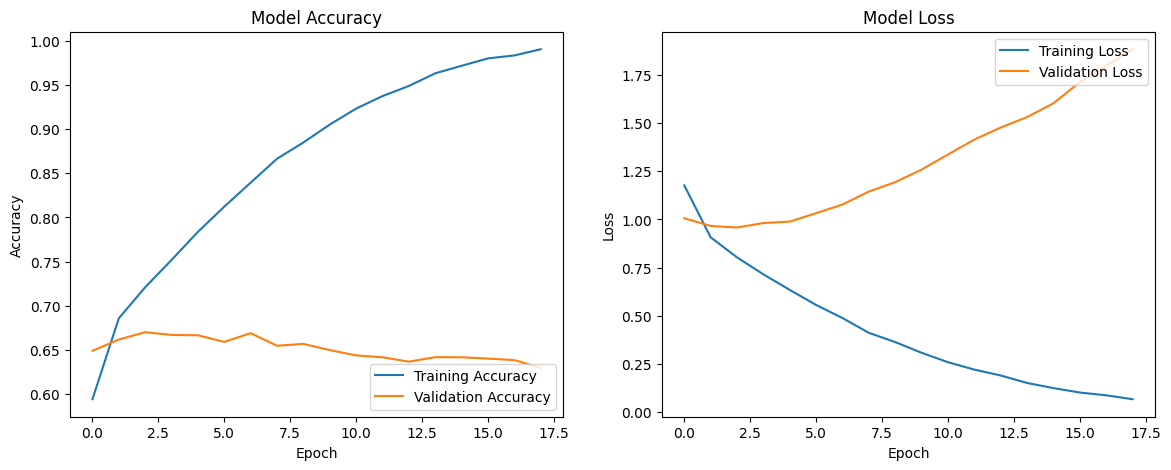

In [37]:
# Plot the training accuracy and loss
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.show()


## `ii` Trial no. 2

## ResNet50V2

### Model Training

In [38]:
model_T2 = Sequential()
model_T2.add(Input(shape=(64,64,3)))
model_T2.add(pre_trained)
model_T2.add(Flatten())
model_T2.add(Dense(64, activation='relu'))
model_T2.add(Dropout(0.25))
model_T2.add(Dense(10, activation='softmax'))

model_T2.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50v2 (Functional)              │ (None, 2, 2, 2048)          │      23,564,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 64)                  │         524,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,089,802 (91.90 MB)

 Trainable params: 525,002 (2.00 MB)

 Non-trainable params: 23,564,800 (89.89 MB)

In [39]:
model_T2.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [40]:
callbacks = [EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)]

In [41]:
history=model_T2.fit(X_train,y_train,batch_size=128,epochs=EPOCHS,validation_split=0.15,callbacks=callbacks)

Epoch 1/100
333/333 ━━━━━━━━━━━━━━━━━━━━ 38s 77ms/step - accuracy: 0.4819 - loss: 1.5572 - val_accuracy: 0.6512 - val_loss: 1.0299
Epoch 2/100
333/333 ━━━━━━━━━━━━━━━━━━━━ 21s 35ms/step - accuracy: 0.6547 - loss: 0.9853 - val_accuracy: 0.6741 - val_loss: 0.9507
Epoch 3/100
333/333 ━━━━━━━━━━━━━━━━━━━━ 20s 33ms/step - accuracy: 0.7044 - loss: 0.8437 - val_accuracy: 0.6843 - val_loss: 0.9375
Epoch 4/100
333/333 ━━━━━━━━━━━━━━━━━━━━ 20s 32ms/step - accuracy: 0.7347 - loss: 0.7450 - val_accuracy: 0.6872 - val_loss: 0.9428
Epoch 5/100
333/333 ━━━━━━━━━━━━━━━━━━━━ 21s 35ms/step - accuracy: 0.7623 - loss: 0.6710 - val_accuracy: 0.6937 - val_loss: 0.9516
Epoch 6/100
333/333 ━━━━━━━━━━━━━━━━━━━━ 20s 35ms/step - accuracy: 0.7877 - loss: 0.5867 - val_accuracy: 0.6821 - val_loss: 0.9820
Epoch 7/100
333/333 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.8010 - loss: 0.5466 - val_accuracy: 0.6883 - val_loss: 1.0079
Epoch 8/100
333/333 ━━━━━━━━━━━━━━━━━━━━ 19s 33ms/step - accuracy: 0.8241 - loss: 0

### Model Evaluation

In [42]:
# Evaluate on the training set
train_loss, train_accuracy = model_T2.evaluate(X_train, y_train, verbose=1)
print(f"Accuracy for training: {train_accuracy * 100:.2f}")

# Evaluate on the testing set
test_loss, test_accuracy = model_T2.evaluate(X_test, y_test, verbose=1)
print(f"Accuracy for testing: {test_accuracy * 100:.2f}")

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 14ms/step - accuracy: 0.7969 - loss: 0.6042
Accuracy for training: 78.08
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.6768 - loss: 0.9463
Accuracy for testing: 67.68


### Result Visualization

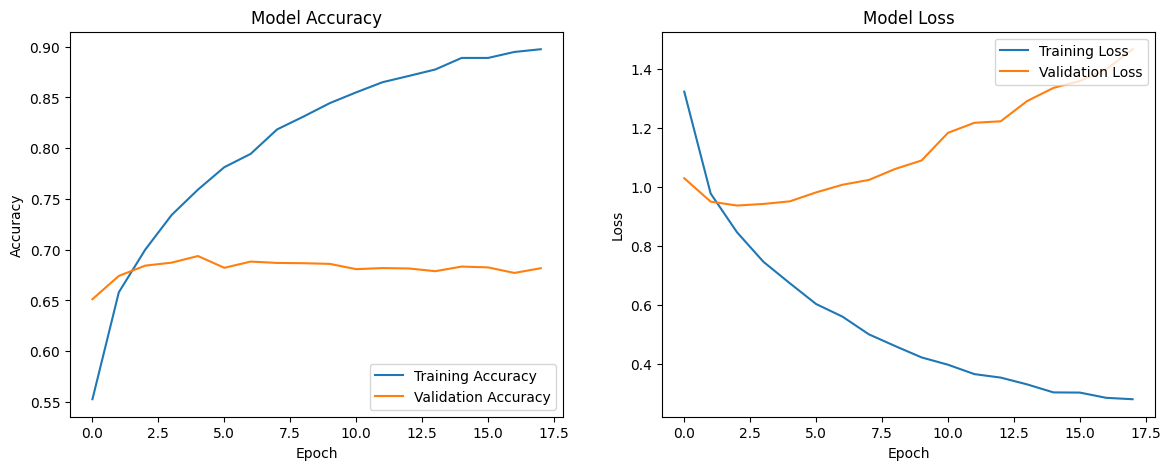

In [43]:
# Plot the training accuracy and loss
# Plot the training accuracy and loss
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.show()



In [44]:
# Making the Predictions
pred = model_T2.predict(X_test)
print(pred)

# Converting the predictions into label index
pred_classes = np.argmax(pred, axis=1)
print(pred_classes)

313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step
[[1.6155248e-03 1.7124137e-02 4.7347168e-03 ... 1.1804839e-02
  1.4410245e-04 1.2405147e-02]
 [7.7039047e-05 5.0465125e-03 6.9510436e-10 ... 2.4765714e-10
  9.9483192e-01 4.4439726e-05]
 [1.1380003e-02 6.7826748e-02 3.4322493e-05 ... 3.6560574e-05
  7.8312290e-01 1.3671210e-01]
 ...
 [1.1583489e-10 1.7985168e-09 2.1032901e-02 ... 4.7726477e-05
  1.2661545e-11 1.0305783e-08]
 [2.1482433e-01 2.7770859e-01 2.7812347e-01 ... 1.2003004e-03
  2.3602331e-02 1.4873863e-02]
 [1.0011434e-07 9.8370923e-10 8.6007472e-05 ... 9.8485512e-01
  8.0242690e-10 9.2667607e-09]]
[3 8 8 ... 5 2 7]


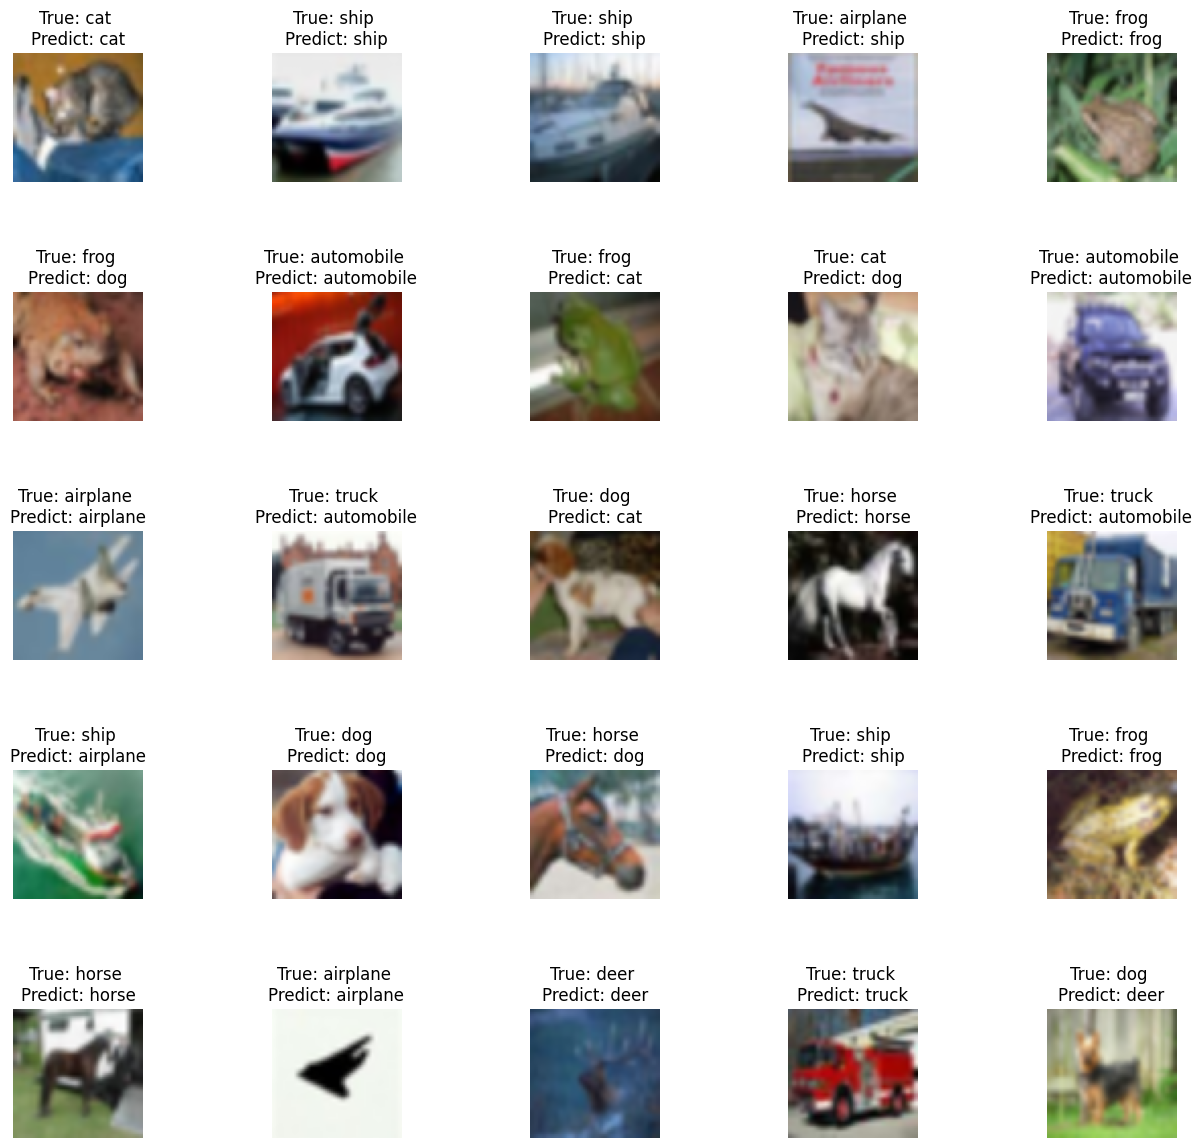

In [45]:
# Plotting the Actual vs. Predicted results

fig, axes = plt.subplots(5, 5, figsize=(15,15))
axes = axes.ravel()

for i in np.arange(0, 25):
    axes[i].imshow(X_test[i])
    axes[i].set_title("True: %s \nPredict: %s" % (class_names[np.argmax(y_test[i])], class_names[pred_classes[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

---

# `03` Assignment 03
- Repeat Assignment 1 and 2 using MNIST dataset but do NOT use transfer learning this time (design the network from scratch)
- Note that you will need to convert the training labels into categorical using one hot encoding using `to_categorical()` function

## `+` Load MNIST Dataset

In [46]:
(X_train, y_train), (X_test, y_test) =keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [47]:
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (60000, 28, 28)
Shape of y_train: (60000,)
Shape of X_test: (10000, 28, 28)
Shape of y_test: (10000,)


### OneHotEncode Target Variable

In [48]:
y_train =keras.utils.to_categorical(y_train)
y_test =keras.utils.to_categorical(y_test)

### Preview the Images

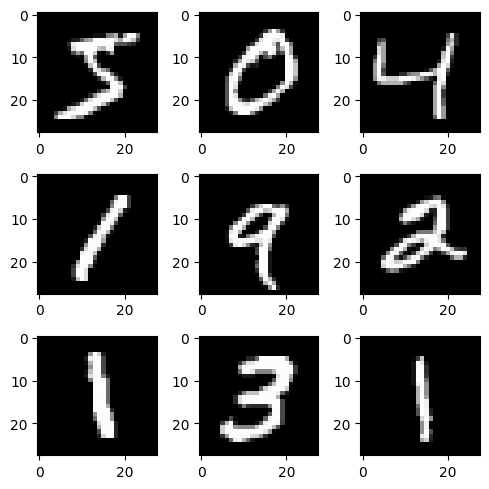

In [49]:
# plot first few images
plt.figure(figsize=(5, 5))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_train[i], cmap='gray')

plt.tight_layout()
plt.show()


### Rescale Independent Features

In [50]:
# Rescale the Input
X_train =X_train/255
X_test  =X_test/255

## `+` Set Global Parameters

In [51]:
# Hyperparameters
BATCH_SIZE  =64
NUM_CLASSES =26
EPOCHS      =100

## `i` ANN Trials

### Trial no. 1

#### Model Training

In [52]:
model=Sequential()
model.add(Input(shape=X_train.shape[1:]))
# model.add(Dense(3072, input_shape=(3072,), activation="relu"))
model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dense(64,activation="relu"))


model.add(Dense(32))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.2))

model.add(Dense(32))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.2))


model.add(Dense(10,activation="softmax"))

model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 116,618 (455.54 KB)

 Trainable params: 116,490 (455.04 KB)

 Non-trainable params: 128 (512.00 B)

In [53]:
model.compile(keras.optimizers.Adam(learning_rate=0.001), loss="categorical_crossentropy", metrics=["accuracy"])

In [54]:
callbacks = [EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)]

In [55]:
history=model.fit(X_train,y_train,batch_size=BATCH_SIZE,epochs=29,validation_split=0.15,callbacks=callbacks)

Epoch 1/29
797/797 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.7462 - loss: 0.9088 - val_accuracy: 0.9451 - val_loss: 0.1835
Epoch 2/29
797/797 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9435 - loss: 0.2232 - val_accuracy: 0.9637 - val_loss: 0.1295
Epoch 3/29
797/797 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9607 - loss: 0.1521 - val_accuracy: 0.9673 - val_loss: 0.1139
Epoch 4/29
797/797 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9696 - loss: 0.1188 - val_accuracy: 0.9692 - val_loss: 0.1177
Epoch 5/29
797/797 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9770 - loss: 0.0947 - val_accuracy: 0.9741 - val_loss: 0.1069
Epoch 6/29
797/797 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9784 - loss: 0.0861 - val_accuracy: 0.9759 - val_loss: 0.0925
Epoch 7/29
797/797 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9824 - loss: 0.0708 - val_accuracy: 0.9747 - val_loss: 0.1031
Epoch 8/29
797/797 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9857 - loss: 0.0589 - val_accuracy: 0

#### Model Ealuation

In [56]:
# Evaluate on the training set
train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=1)
print(f"Accuracy for training: {train_accuracy * 100:.2f}")

# Evaluate on the testing set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Accuracy for testing: {test_accuracy * 100:.2f}")

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9927 - loss: 0.0255
Accuracy for training: 99.02
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9711 - loss: 0.1129
Accuracy for testing: 97.63


#### Result Visualization

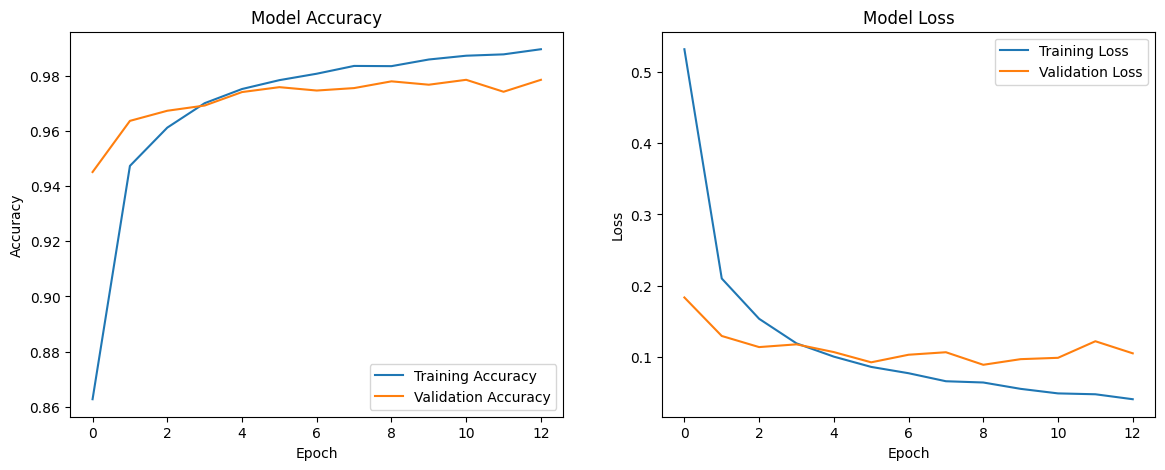

In [57]:
# Plot the training accuracy and loss
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.show()




## `ii` CNN Trials

### Trial no. 1

#### Datasets Reshaping

In [82]:
(X_train, y_train), (X_test, y_test) =keras.datasets.mnist.load_data()

In [83]:
y_train =keras.utils.to_categorical(y_train,26)
y_test =keras.utils.to_categorical(y_test,26)

In [84]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

#### Model Training

In [85]:
model_1=Sequential()
model_1.add(Input(shape=X_train.shape[1:]))
model_1.add(Conv2D(64,(5,5),padding="same"))
model_1.add(MaxPooling2D(2,2))

model_1.add(Conv2D(32,(3,3),padding="same"))
model_1.add(MaxPooling2D(2,2))


model_1.add(Conv2D(64,(3,3)))
model_1.add(MaxPooling2D(2,2))

model_1.add(Flatten())
model_1.add(Dense(128,activation="relu"))
model_1.add(Dropout(0.2))

model_1.add(Dense(64))
model_1.add(BatchNormalization())
model_1.add(Activation("relu"))
model_1.add(Dropout(0.2))

model_1.add(Dense(26,activation="softmax"))


model_1.summary()


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 28, 28, 64)          │           1,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 14, 14, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 7, 7, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 5, 5, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 2, 2, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_6 (Activation)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 26)                  │           1,690 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 81,722 (319.23 KB)

 Trainable params: 81,594 (318.73 KB)

 Non-trainable params: 128 (512.00 B)

In [86]:
model_1.compile(keras.optimizers.Adam(learning_rate=0.001), loss="categorical_crossentropy", metrics=["accuracy"])

In [87]:
callbacks = [EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)]

In [88]:
history=model_1.fit(X_train,y_train,batch_size=BATCH_SIZE,epochs=10,validation_split=0.15,callbacks=callbacks)

Epoch 1/10
797/797 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8370 - loss: 0.6993 - val_accuracy: 0.9812 - val_loss: 0.0660
Epoch 2/10
797/797 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9747 - loss: 0.0849 - val_accuracy: 0.9829 - val_loss: 0.0557
Epoch 3/10
797/797 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9830 - loss: 0.0584 - val_accuracy: 0.9846 - val_loss: 0.0495
Epoch 4/10
797/797 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9867 - loss: 0.0462 - val_accuracy: 0.9866 - val_loss: 0.0502
Epoch 5/10
797/797 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9892 - loss: 0.0375 - val_accuracy: 0.9886 - val_loss: 0.0434
Epoch 6/10
797/797 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9905 - loss: 0.0311 - val_accuracy: 0.9884 - val_loss: 0.0457
Epoch 7/10
797/797 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9914 - loss: 0.0284 - val_accuracy: 0.9834 - val_loss: 0.0659
Epoch 8/10
797/797 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9931 - loss: 0.0241 - val_accuracy: 0

#### Model Evaluation

In [89]:
# Evaluate on the training set
train_loss, train_accuracy = model_1.evaluate(X_train, y_train, verbose=1)
print(f"Accuracy for training: {train_accuracy * 100:.2f}")

# Evaluate on the testing set
test_loss, test_accuracy = model_1.evaluate(X_test, y_test, verbose=1)
print(f"Accuracy for testing: {test_accuracy * 100:.2f}")

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9962 - loss: 0.0109
Accuracy for training: 99.53
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9887 - loss: 0.0383
Accuracy for testing: 99.02


#### Result Visualization

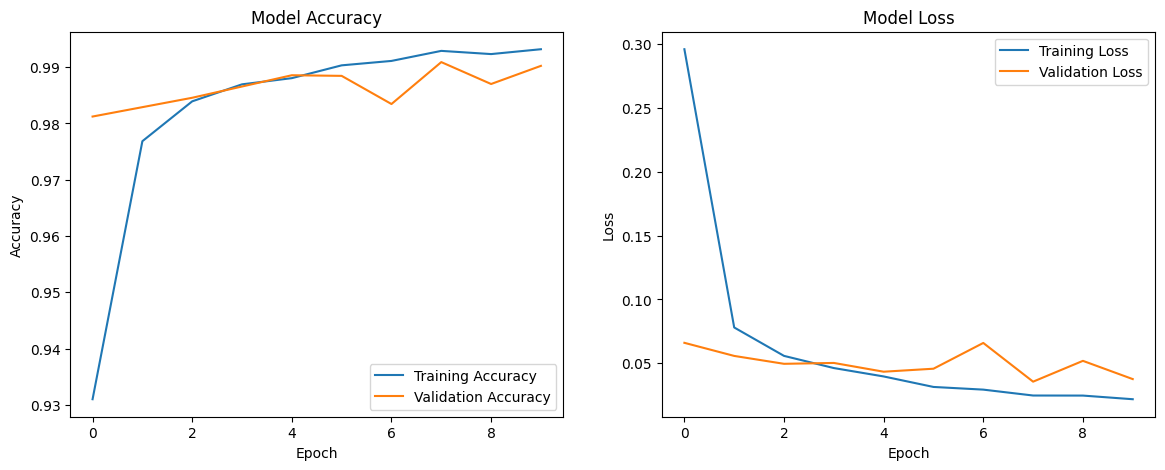

In [90]:
# Plot the training accuracy and loss
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.show()



### Trial no. 2

#### Model Training

### MobileNetV2

In [94]:
#  Step 1: Load EMNIST Data
(X_train, y_train), (X_test, y_test) =keras.datasets.mnist.load_data()

In [95]:
#  Step 2: Convert grayscale (1 channel) → RGB (3 channels)
X_train = np.repeat(X_train[..., np.newaxis], 3, axis=-1)  # (num_samples, 28, 28, 3)
X_test = np.repeat(X_test[..., np.newaxis], 3, axis=-1)

In [96]:
#  Step 3: Resize images from 28×28 → 32×32
def resize_images(images, new_size=(32, 32)):
    images_resized = np.array([tf.image.resize(img, new_size).numpy() for img in images])
    return images_resized

In [97]:
X_train = resize_images(X_train)
X_test = resize_images(X_test)

In [98]:
# Step 4: Normalize pixel values (0-255 → 0-1)
X_train = X_train / 255.0
X_test = X_test / 255.0


In [99]:
#  Step 5: One-hot encode labels
num_classes = 26  # Adjust for EMNIST letters
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [100]:
#  Load Pretrained MobileNetV2
base_model = MobileNetV2(input_shape=(32, 32, 3), weights='imagenet', include_top=False)
base_model.trainable = False


<ipython-input-100-f0a6897d6b1d>:2: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(input_shape=(32, 32, 3), weights='imagenet', include_top=False)


In [101]:
model = Sequential()
model.add(base_model)  # Add pretrained model as the first layer
model.add(GlobalAveragePooling2D())  # Reduce feature maps
model.add(Dense(128, activation='relu'))  # Fully connected layer
model.add(Dense(26, activation='softmax'))  # Output layer

In [102]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [103]:
callbacks = [EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)]

In [104]:
model.fit(X_train, y_train, validation_split=0.15, epochs=100, batch_size=64,callbacks=callbacks)

Epoch 1/100
797/797 ━━━━━━━━━━━━━━━━━━━━ 20s 18ms/step - accuracy: 0.5124 - loss: 1.6905 - val_accuracy: 0.6809 - val_loss: 0.9461
Epoch 2/100
797/797 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6759 - loss: 0.9637 - val_accuracy: 0.7019 - val_loss: 0.8857
Epoch 3/100
797/797 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.6869 - loss: 0.9150 - val_accuracy: 0.7112 - val_loss: 0.8527
Epoch 4/100
797/797 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.6985 - loss: 0.8817 - val_accuracy: 0.7186 - val_loss: 0.8353
Epoch 5/100
797/797 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.7096 - loss: 0.8549 - val_accuracy: 0.7210 - val_loss: 0.8146
Epoch 6/100
797/797 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7112 - loss: 0.8402 - val_accuracy: 0.7281 - val_loss: 0.7977
Epoch 7/100
797/797 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7150 - loss: 0.8267 - val_accuracy: 0.7262 - val_loss: 0.7967
Epoch 8/100
797/797 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.7212 - loss: 0.8121 - 

#### Model Evaluation

In [105]:
# Evaluate on the training set
train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=1)
print(f"Accuracy for training: {train_accuracy * 100:.2f}")

# Evaluate on the testing set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Accuracy for testing: {test_accuracy * 100:.2f}")

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7518 - loss: 0.7135
Accuracy for training: 74.93
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.7156 - loss: 0.8013
Accuracy for testing: 73.15


#### Result Visualization

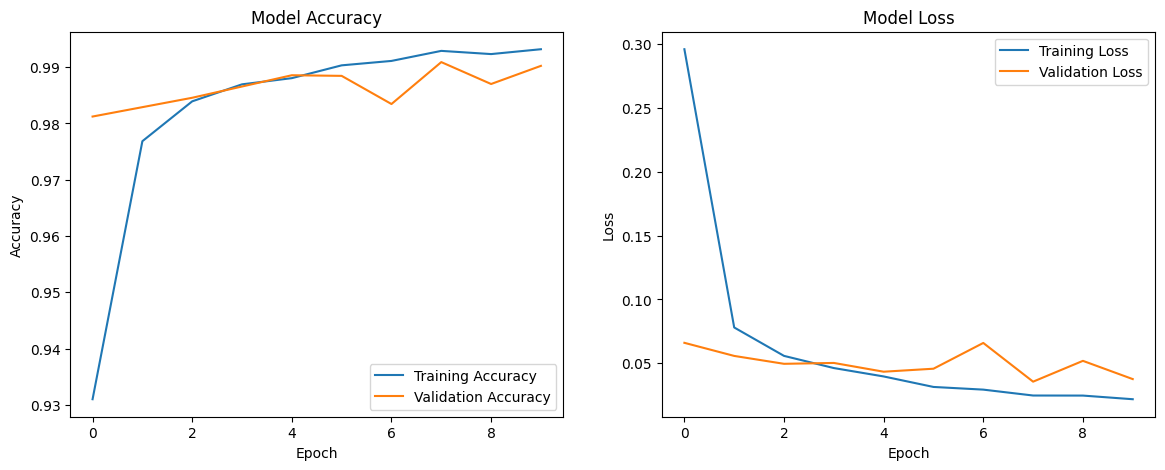

In [106]:
# Plot the training accuracy and loss
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.show()



In [107]:
# Making the Predictions
pred = model.predict(X_test)
print(pred)

# Converting the predictions into label index
pred_classes = np.argmax(pred, axis=1)
print(pred_classes)

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step
[[5.80633941e-09 2.22661924e-06 9.96157155e-07 ... 1.31483257e-13
  1.83107151e-13 1.78145042e-13]
 [4.55903588e-04 2.09908444e-03 9.52315807e-01 ... 6.45149545e-10
  4.97845876e-10 6.28501251e-10]
 [1.06264371e-04 9.88620698e-01 1.50389748e-03 ... 4.04077986e-12
  7.17858932e-12 4.98310638e-12]
 ...
 [8.49003918e-05 2.72749900e-03 3.62351984e-02 ... 1.36720602e-09
  1.53150770e-09 7.89007026e-10]
 [2.34851718e-01 2.03617151e-06 4.77622934e-02 ... 6.42201181e-09
  4.53725058e-09 2.23862573e-09]
 [1.12500368e-03 6.67647982e-04 1.62537880e-02 ... 1.04181046e-10
  6.48625528e-11 5.37633063e-11]]
[7 2 1 ... 4 6 5]


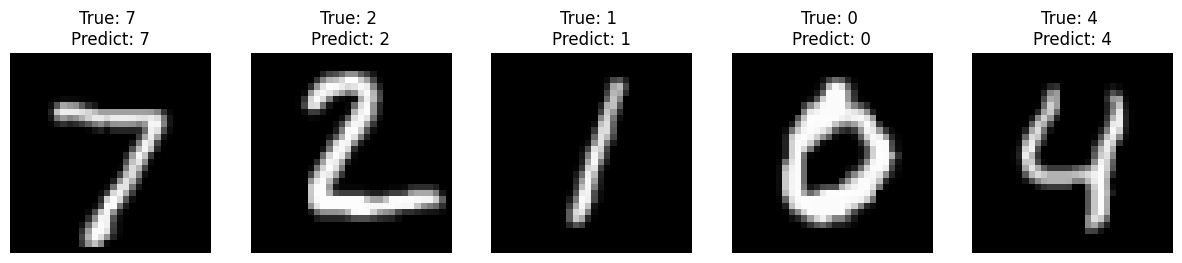

In [109]:
import matplotlib.pyplot as plt

# Define class labels
class_names = [str(i) for i in range(10)]  # Adjust if using different classes

# Plot some predictions
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for i in range(5):  # Display first 5 images
    axes[i].imshow(X_test[i], cmap='gray')  # Show image
    true_label = class_names[np.argmax(y_test[i])]  # Convert one-hot to label
    predicted_label = class_names[pred_classes[i]]  # Get predicted label
    axes[i].set_title(f"True: {true_label} \nPredict: {predicted_label}")
    axes[i].axis('off')

plt.show()


----------------------------------------------

$$ Wish \space you \space all \space the \space best \space ♡ $$
$$ Abdelrahman \space Eid $$